In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers,models

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
X_train=train_df.drop('label',axis=1).values  
Y_train=train_df['label'].values

X_test=test_df.drop('label',axis=1).values
Y_test=test_df['label'].values

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [6]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),    #fully connected layer
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  #o/p layer
])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(X_train,Y_train, epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 298s 189ms/step - accuracy: 0.7132 - loss: 0.7876 - val_accuracy: 0.8813 - val_loss: 0.3341
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 249s 140ms/step - accuracy: 0.8593 - loss: 0.3915 - val_accuracy: 0.8972 - val_loss: 0.2865
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 244s 128ms/step - accuracy: 0.8808 - loss: 0.3279 - val_accuracy: 0.9070 - val_loss: 0.2618
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 169s 112ms/step - accuracy: 0.8917 - loss: 0.2964 - val_accuracy: 0.9143 - val_loss: 0.2392
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 231s 131ms/step - accuracy: 0.9009 - loss: 0.2711 - val_accuracy: 0.9163 - val_loss: 0.2367


In [9]:
loss,metrics=model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9122 - loss: 0.2291


In [10]:
print(metrics*100)

91.6599988937378


In [11]:
y_prob=model.predict(X_test)
print(y_prob)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step
[[9.8715580e-01 6.6750758e-08 6.0057191e-05 ... 5.9683453e-14
  1.8092349e-07 1.0422562e-12]
 [3.6775499e-10 1.0000000e+00 3.1005115e-11 ... 2.2942920e-17
  2.6131455e-10 7.9919703e-16]
 [1.4484759e-03 3.7202754e-09 9.3774956e-01 ... 1.5490906e-10
  6.6106677e-06 1.0179128e-09]
 ...
 [5.7191102e-10 1.4934213e-15 1.5620490e-13 ... 5.2276320e-13
  1.0000000e+00 8.4644687e-12]
 [4.4759877e-06 8.2657209e-08 4.7715957e-07 ... 1.4320286e-06
  9.9991930e-01 4.5017699e-05]
 [2.2807543e-03 9.6499389e-01 8.5763726e-04 ... 8.5573171e-05
  5.4701893e-03 5.4867059e-04]]


In [12]:
#upper prob h har class ka 
#convert probability vectors into a single class label.
#argmax(axis=-1) returns the index of the highest value in each row
y_pred = y_prob.argmax(axis=-1)

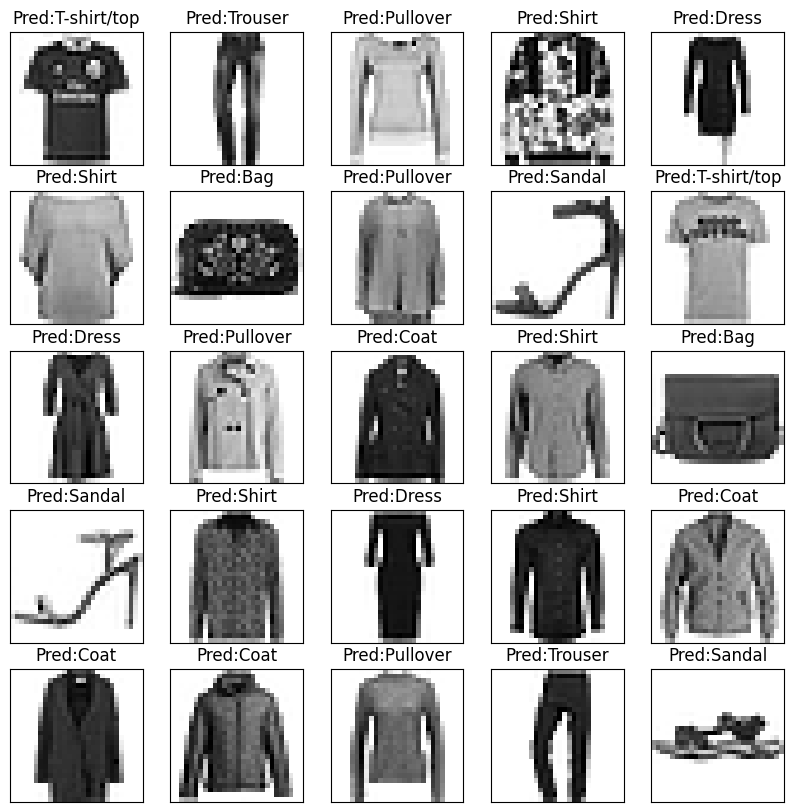

In [13]:
#visualize 25 Fashion MNIST test images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])   #line hataaega axis waali
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i],plt.cm.binary)  #plt.cm.binary is a built-in colormap that shows images in black and white (grayscale). colormap
    plt.title(f"Pred:{class_names[y_pred[i]]}")
plt.show()


In [15]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
test_df.count

<bound method DataFrame.count of       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         0       0       0       0       0       0       0       0       9   
1         1       0       0       0       0       0       0       0       0   
2         2       0       0       0       0       0       0      14      53   
3         2       0       0       0       0       0       0       0       0   
4         3       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995      0       0       0       0       0       0       0       0       0   
9996      6       0       0       0       0       0       0       0       0   
9997      8       0       0       0       0       0       0       0       0   
9998      8       0       1       3       0       0       0       0       0   
9999      1       0       0       0       0       0       0       0     140   

      pixel9  ... 

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [22]:
traindf=pd.read_csv('fashion-mnist_train.csv')
testdf=pd.read_csv('fashion-mnist_test.csv')

In [23]:
xtrain=traindf.drop('label',axis=1).values
ytrain=traindf['label']

xtest=testdf.drop('label',axis=1).values
ytest=testdf['label']

In [24]:
xtrain=xtrain/255.0
xtest=xtest/255.0

In [25]:
xtrain=xtrain.reshape(-1,28,28,1)
xtest=xtest.reshape(-1,28,28,1)

In [28]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 503,690 (1.92 MB)

 Trainable params: 503,690 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
history=model.fit(xtrain,ytrain,epochs=5,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 184s 117ms/step - accuracy: 0.7112 - loss: 0.7768 - val_accuracy: 0.8682 - val_loss: 0.3550
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 155s 85ms/step - accuracy: 0.8577 - loss: 0.3897 - val_accuracy: 0.8982 - val_loss: 0.2804
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 150s 100ms/step - accuracy: 0.8840 - loss: 0.3241 - val_accuracy: 0.9067 - val_loss: 0.2595
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 205s 102ms/step - accuracy: 0.8897 - loss: 0.3042 - val_accuracy: 0.9075 - val_loss: 0.2571
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 214s 111ms/step - accuracy: 0.9003 - loss: 0.2710 - val_accuracy: 0.9095 - val_loss: 0.2447


In [38]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9059 - loss: 0.2406


[0.23329326510429382, 0.9089999794960022]

In [39]:
yprob=model.predict(xtest)
print(yprob)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
[[9.89105880e-01 2.10777595e-09 1.20583216e-04 ... 1.11734775e-12
  8.71435475e-07 1.18918146e-12]
 [1.47175263e-06 9.99981403e-01 2.36519540e-07 ... 4.49682458e-10
  9.80682898e-07 1.17680532e-09]
 [8.14501848e-03 6.24310843e-08 6.74039781e-01 ... 1.94539926e-10
  1.28555157e-05 2.58049759e-09]
 ...
 [2.07008122e-09 1.78871362e-16 1.66019212e-11 ... 9.46690060e-10
  1.00000000e+00 5.37872307e-12]
 [1.19094492e-03 1.14156694e-06 1.81991156e-04 ... 3.30393596e-06
  9.96463001e-01 1.06880643e-05]
 [6.96612196e-03 9.10877883e-01 6.61226083e-03 ... 3.69464571e-04
  2.60974001e-03 2.99000210e-04]]


In [40]:
ypred=yprob.argmax(axis=-1)

In [41]:
traindf['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

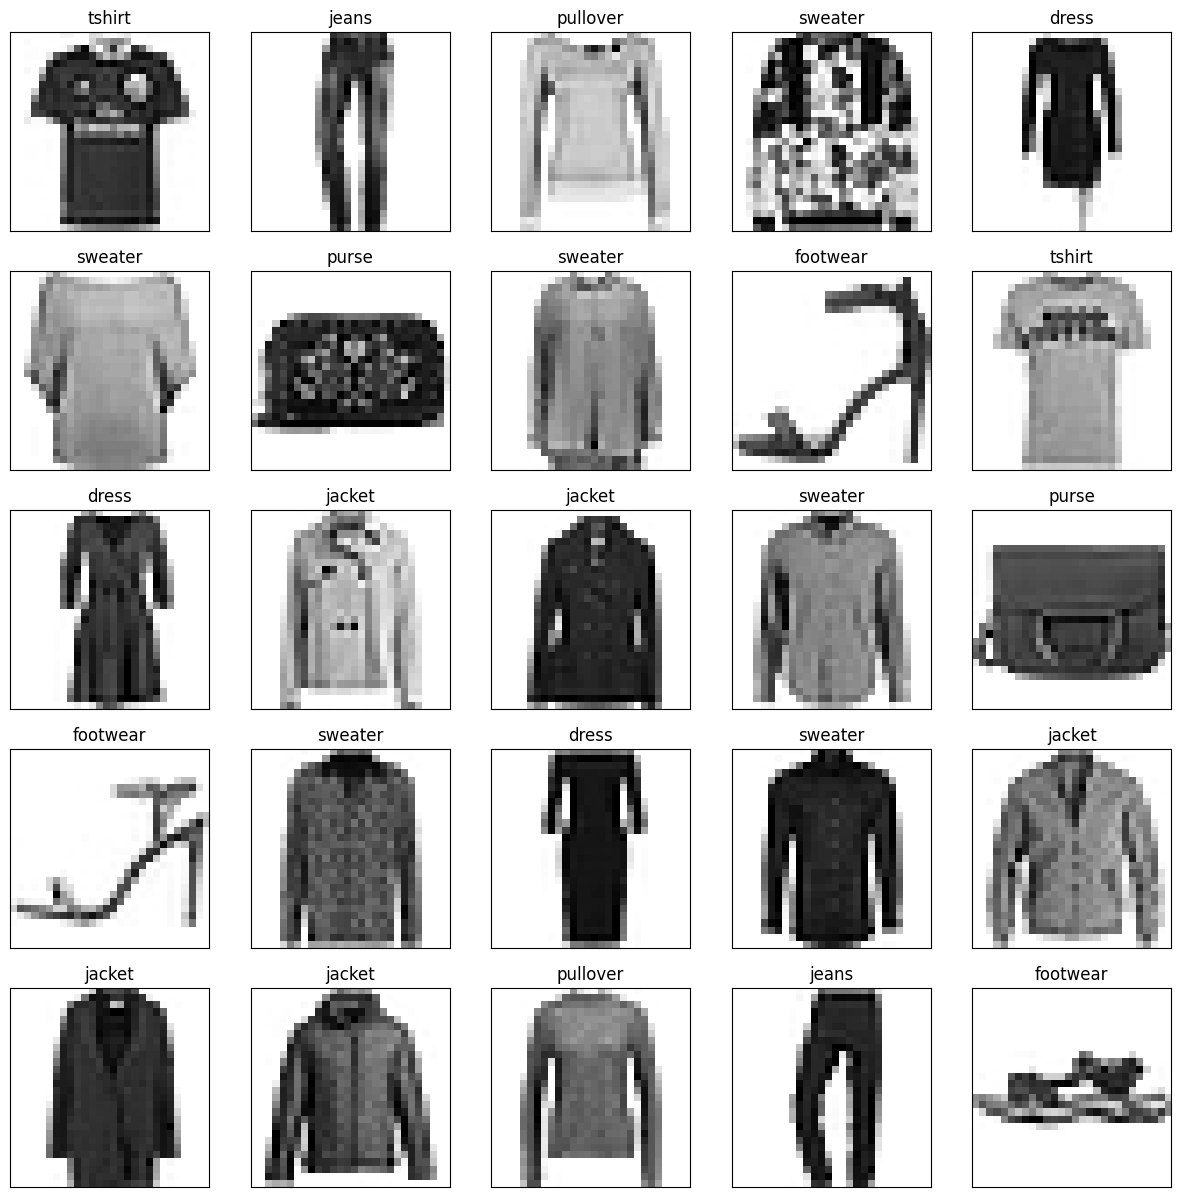

In [48]:
class_names=['tshirt','jeans','pullover','dress','jacket','footwear','sweater','pants','purse','clutch']
plt.figure(figsize=(15,15),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtest[i],plt.cm.binary)
    plt.title(f"{class_names[ypred[i]]}")
    